In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

In [3]:
df=pd.read_csv("Q12.csv")
iso=df.groupby(df.iso_code)
deu=iso.get_group("DEU")
deu["date"]=pd.to_datetime(deu["date"])

<ipython-input-3-45bdfd3f0690>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deu["date"]=pd.to_datetime(deu["date"])


# Frage 1: How effictive are vaccines?


## Plotting

Text(0, 0.5, 'Anzahl Fälle')

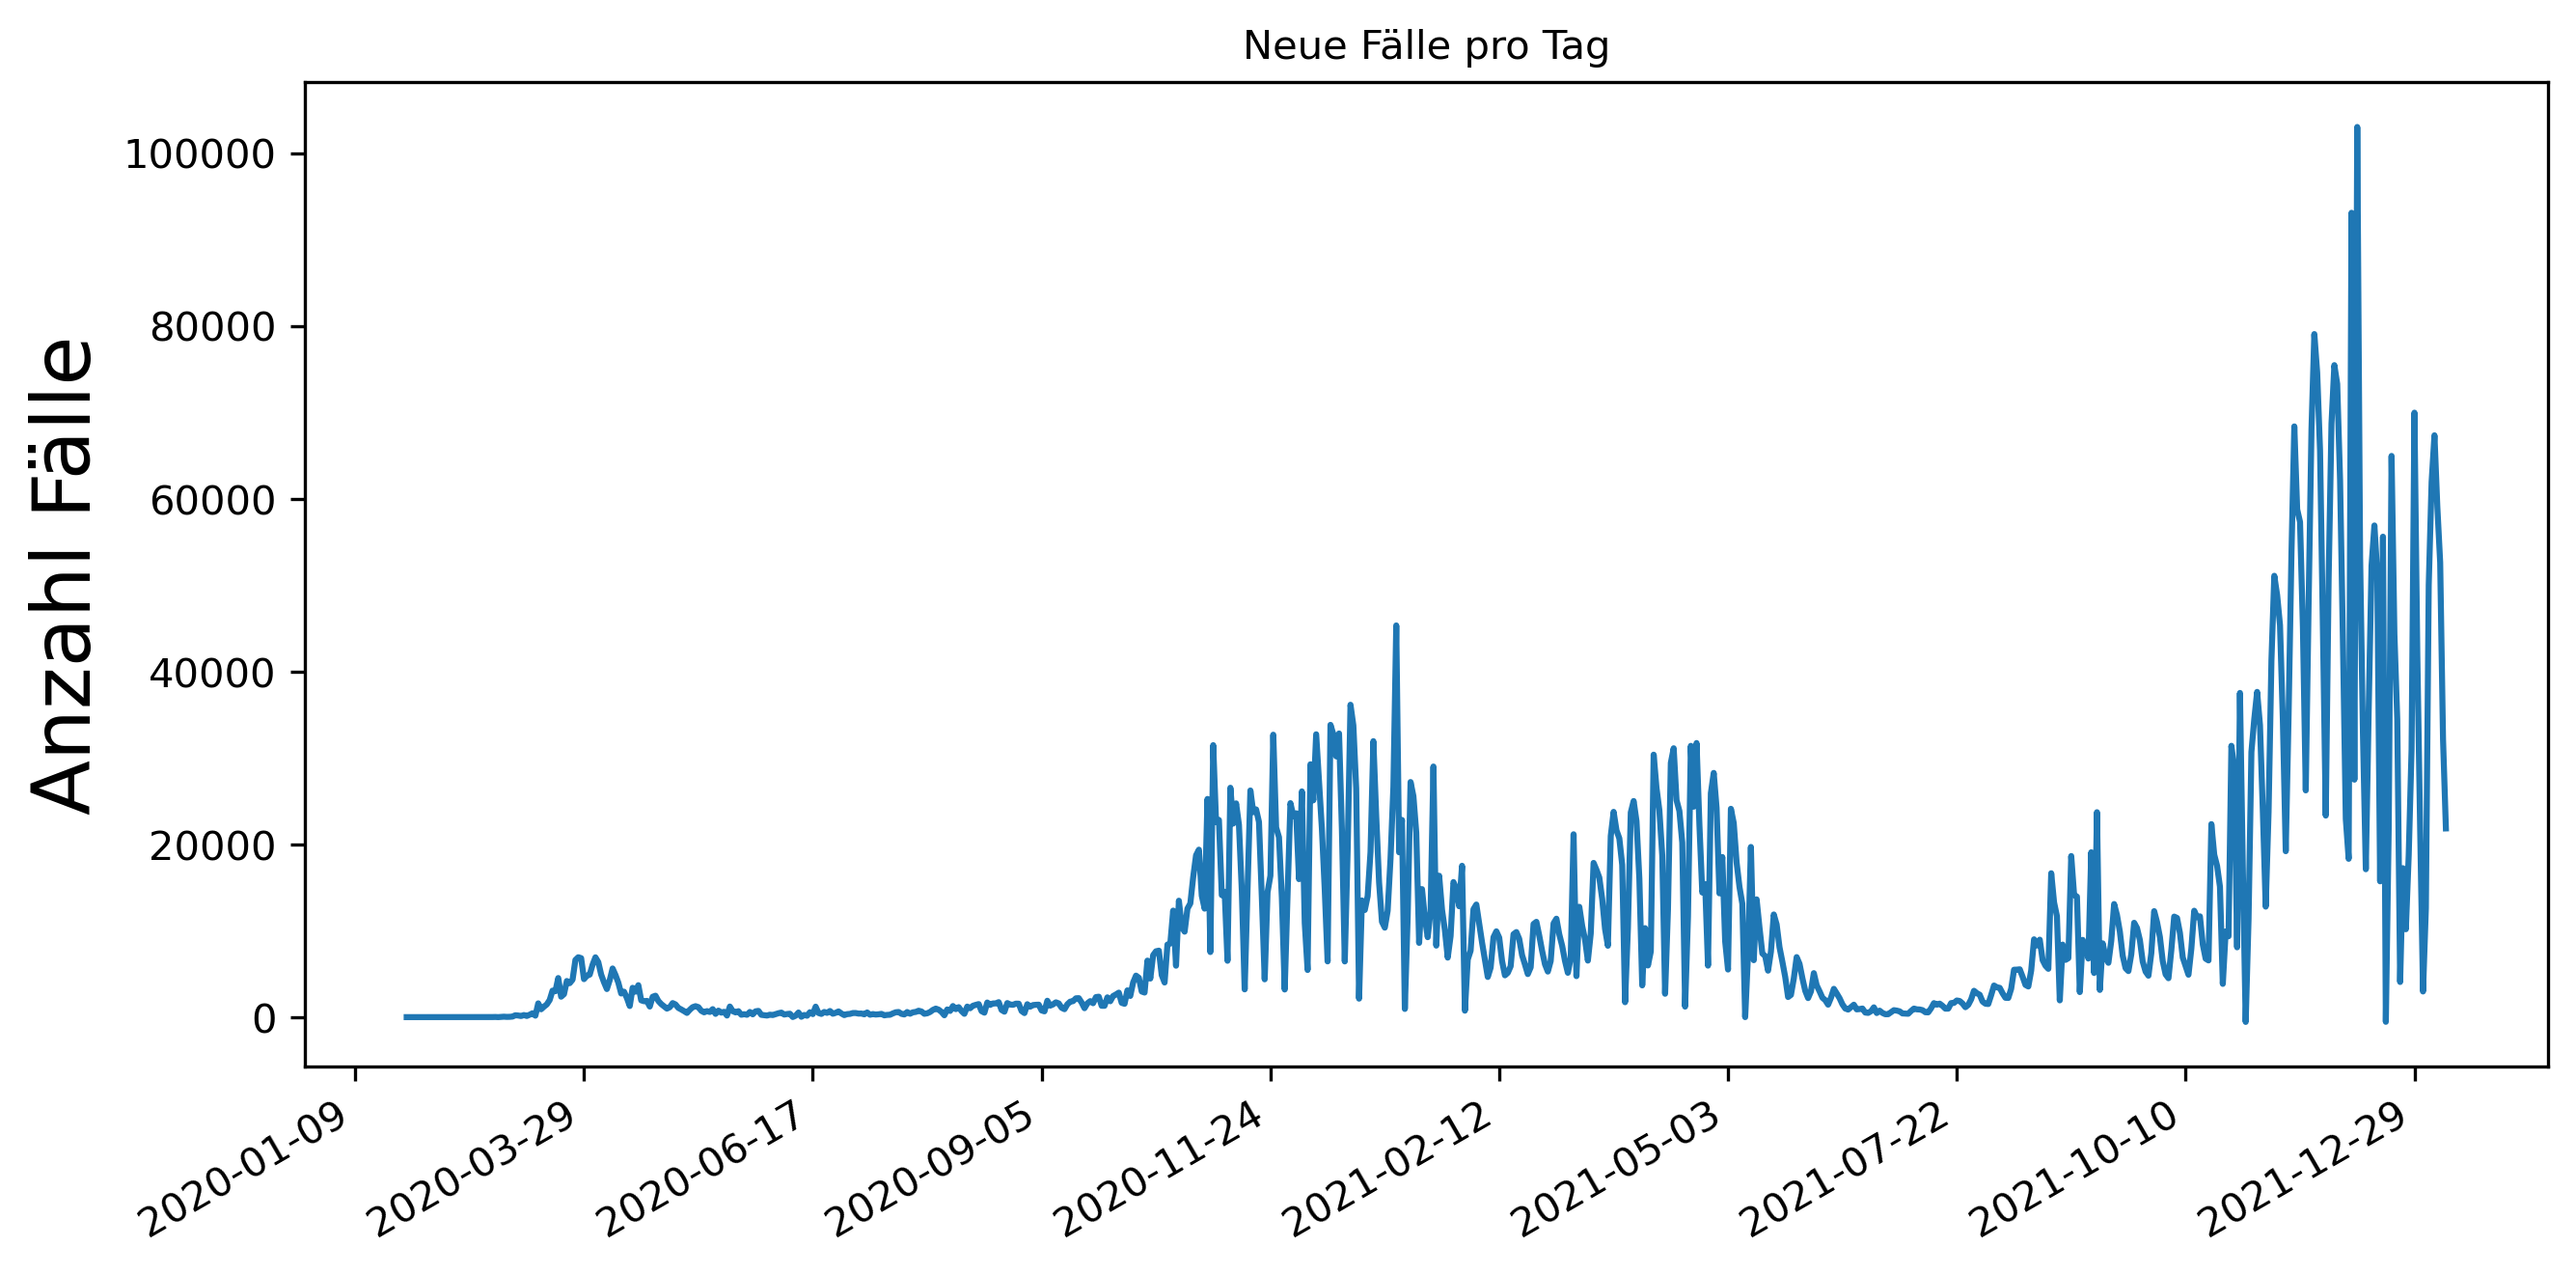

In [4]:
fig, axes = plt.subplots(figsize=(10,5),dpi=300)
fig.autofmt_xdate()
axes.plot(deu.date,deu.new_cases)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=80))
plt.title("Neue Fälle pro Tag", fontsize=10, y=1.0)
axes.set_ylabel('Anzahl Fälle', fontsize=20)

## Inzidenz (Neue Fälle der letzten 7 Tage pro 100.000)

In [5]:
#selected=["new_cases_per_million"]
deu_in = deu[["new_cases"]]
faelle=deu_in.to_numpy() 

In [6]:
k=sum(faelle[714-6:714+1])*100000/83900471
k

array([351.53557124])

In [7]:
siebeninz=[0,0,0,0,0,0]
for ind in range(6,714):
    summ=sum(faelle[ind-6:ind+1])
    summ=summ*(100000/83900471)
    siebeninz.append(summ)
#siebeninz[700:-1]
deu["inz"]=siebeninz

<ipython-input-7-a707531f5b6f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deu["inz"]=siebeninz


Text(0.5, 1.0, 'Inz: ')

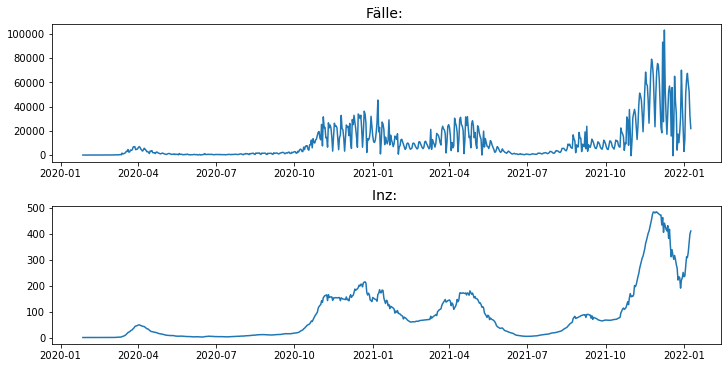

In [8]:
fig, (ax2, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(10,5),constrained_layout=True)
ax2.plot(deu.date,deu.new_cases)
ax1.plot(deu.date,deu.inz)
#fig.tight_layout()
ax2.set_title('Fälle: ',fontsize = 14,loc="center")
ax1.set_title('Inz: ',fontsize = 14)

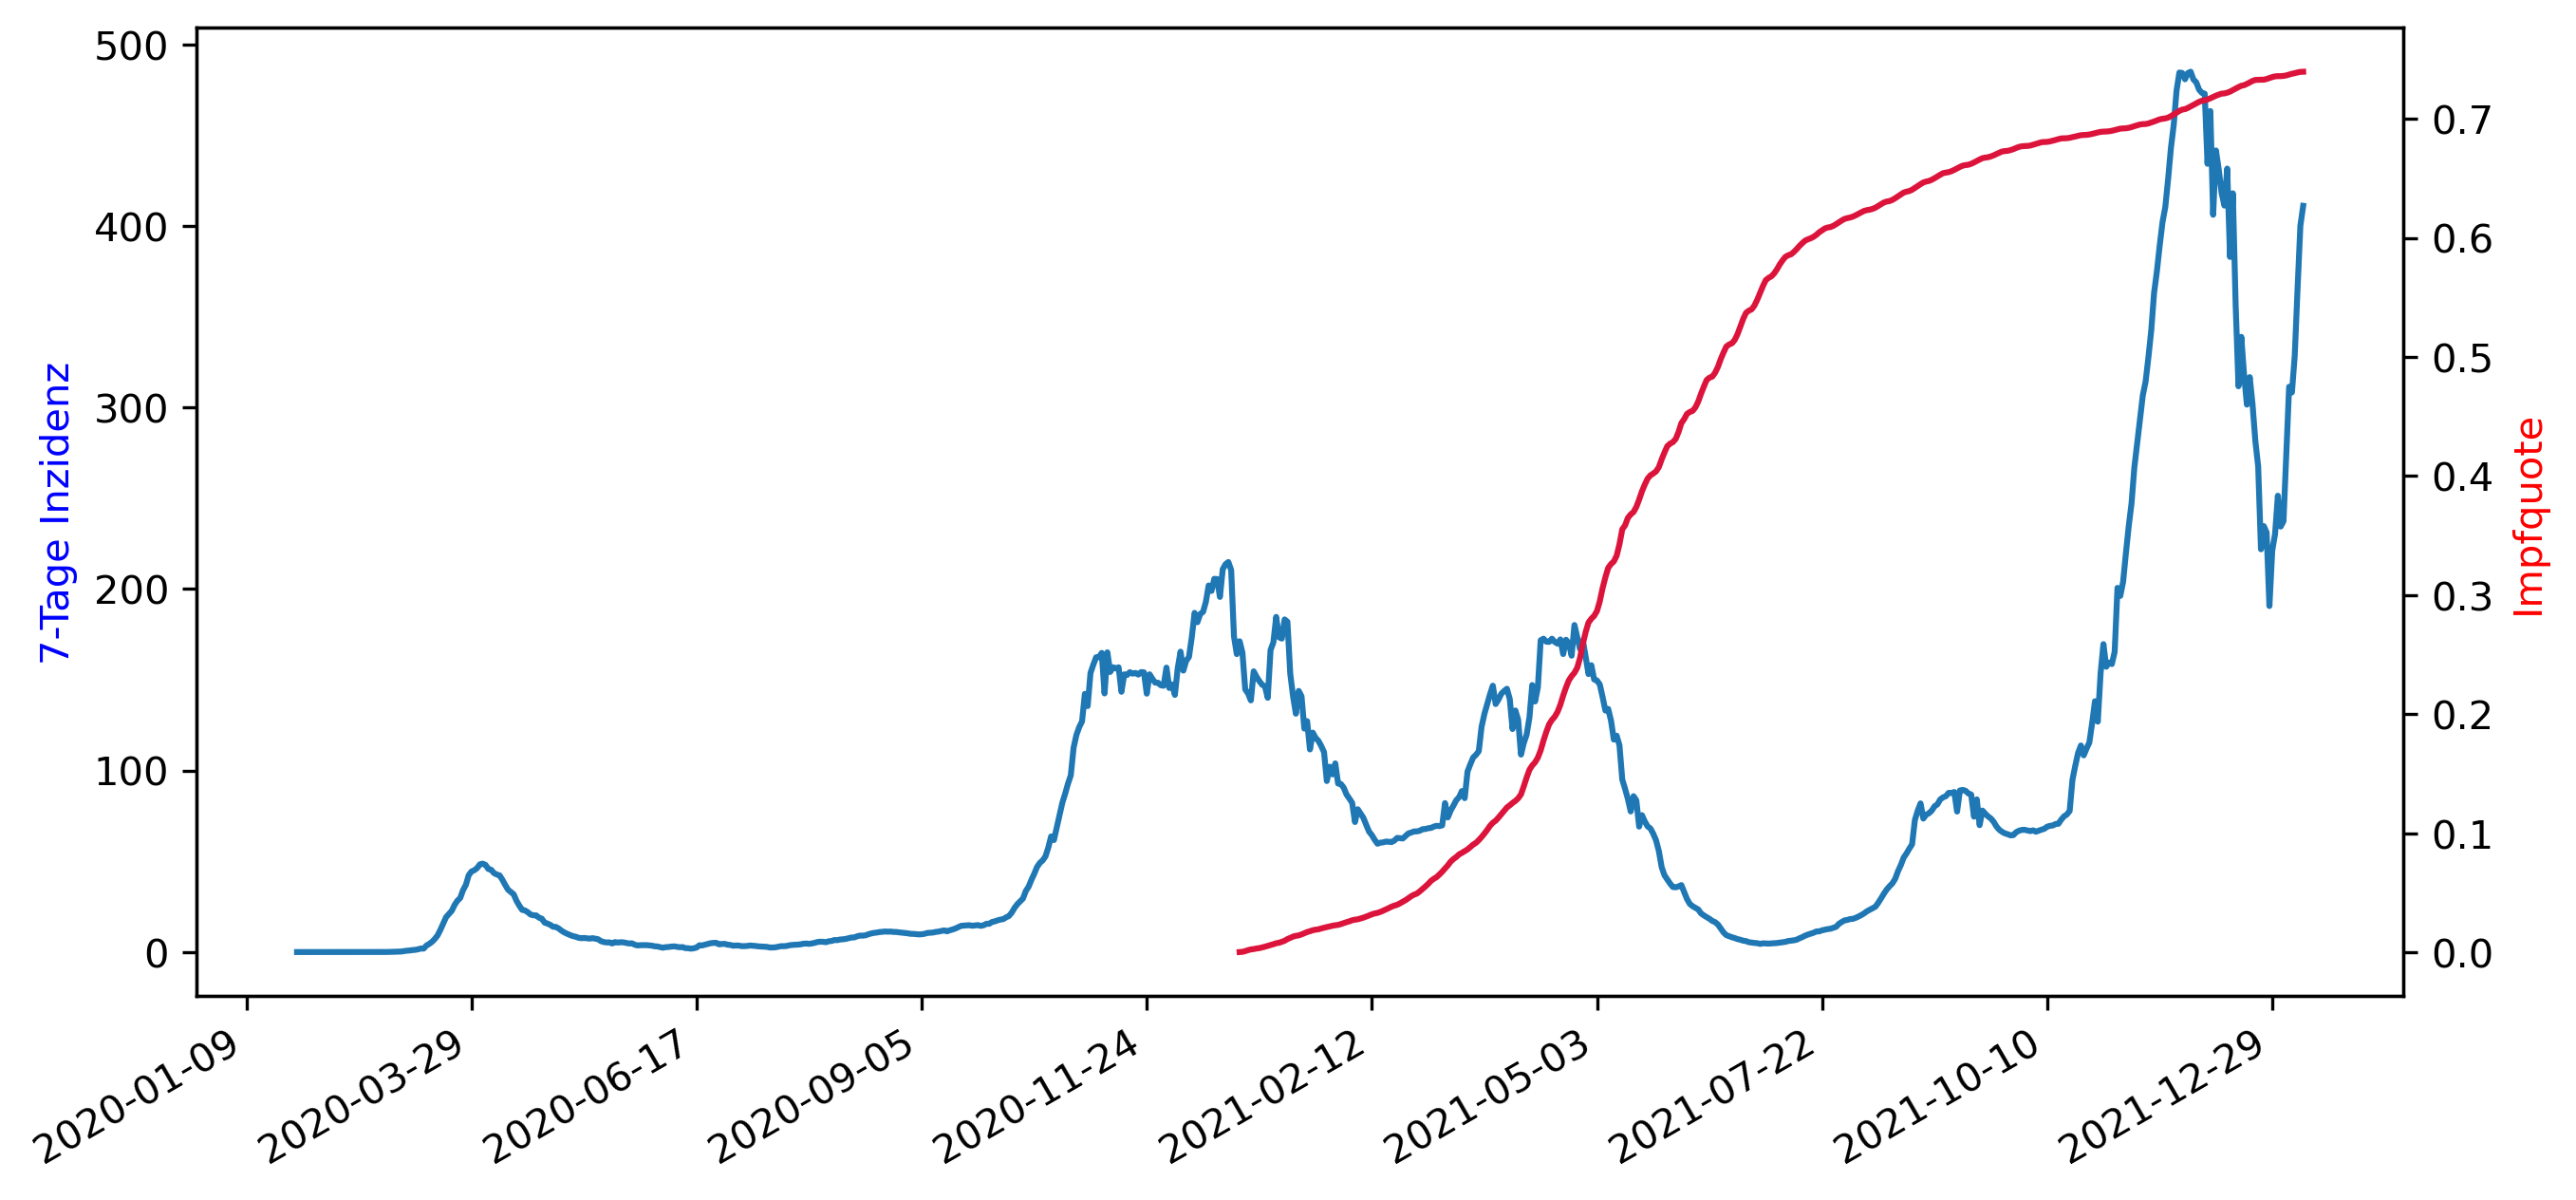

In [9]:
fig, ax1 = plt.subplots(figsize=(10,5),dpi=300)
fig.autofmt_xdate()
ax1.plot(deu.date,deu.inz)
ax2 = ax1.twinx()
ax2.plot(deu.date,deu.people_vaccinated_per_hundred/100,color="crimson")
ax1.set_ylabel('7-Tage Inzidenz', color='b')
ax2.set_ylabel('Impfquote', color='r')
#ylim = ax2.get_ylim()
#plt.vlines("2021-11-01",*ylim,colors="k")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=80))

In [10]:
deu["leth"]=(deu.total_deaths_per_million/deu.total_cases_per_million)
deu["mort"]=(deu.total_deaths/deu.total_cases)
#geimpft=our_deu[selected_cols].loc[(our_deu.new_cases>0) & (our_deu.new_deaths>0) & (our_deu.new_deaths!=our_deu.new_cases)&(our_deu.people_fully_vaccinated>0)]

<ipython-input-10-eb7ffc9223fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deu["leth"]=(deu.total_deaths_per_million/deu.total_cases_per_million)
<ipython-input-10-eb7ffc9223fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deu["mort"]=(deu.total_deaths/deu.total_cases)


Text(0, 0.5, 'Impfquote')

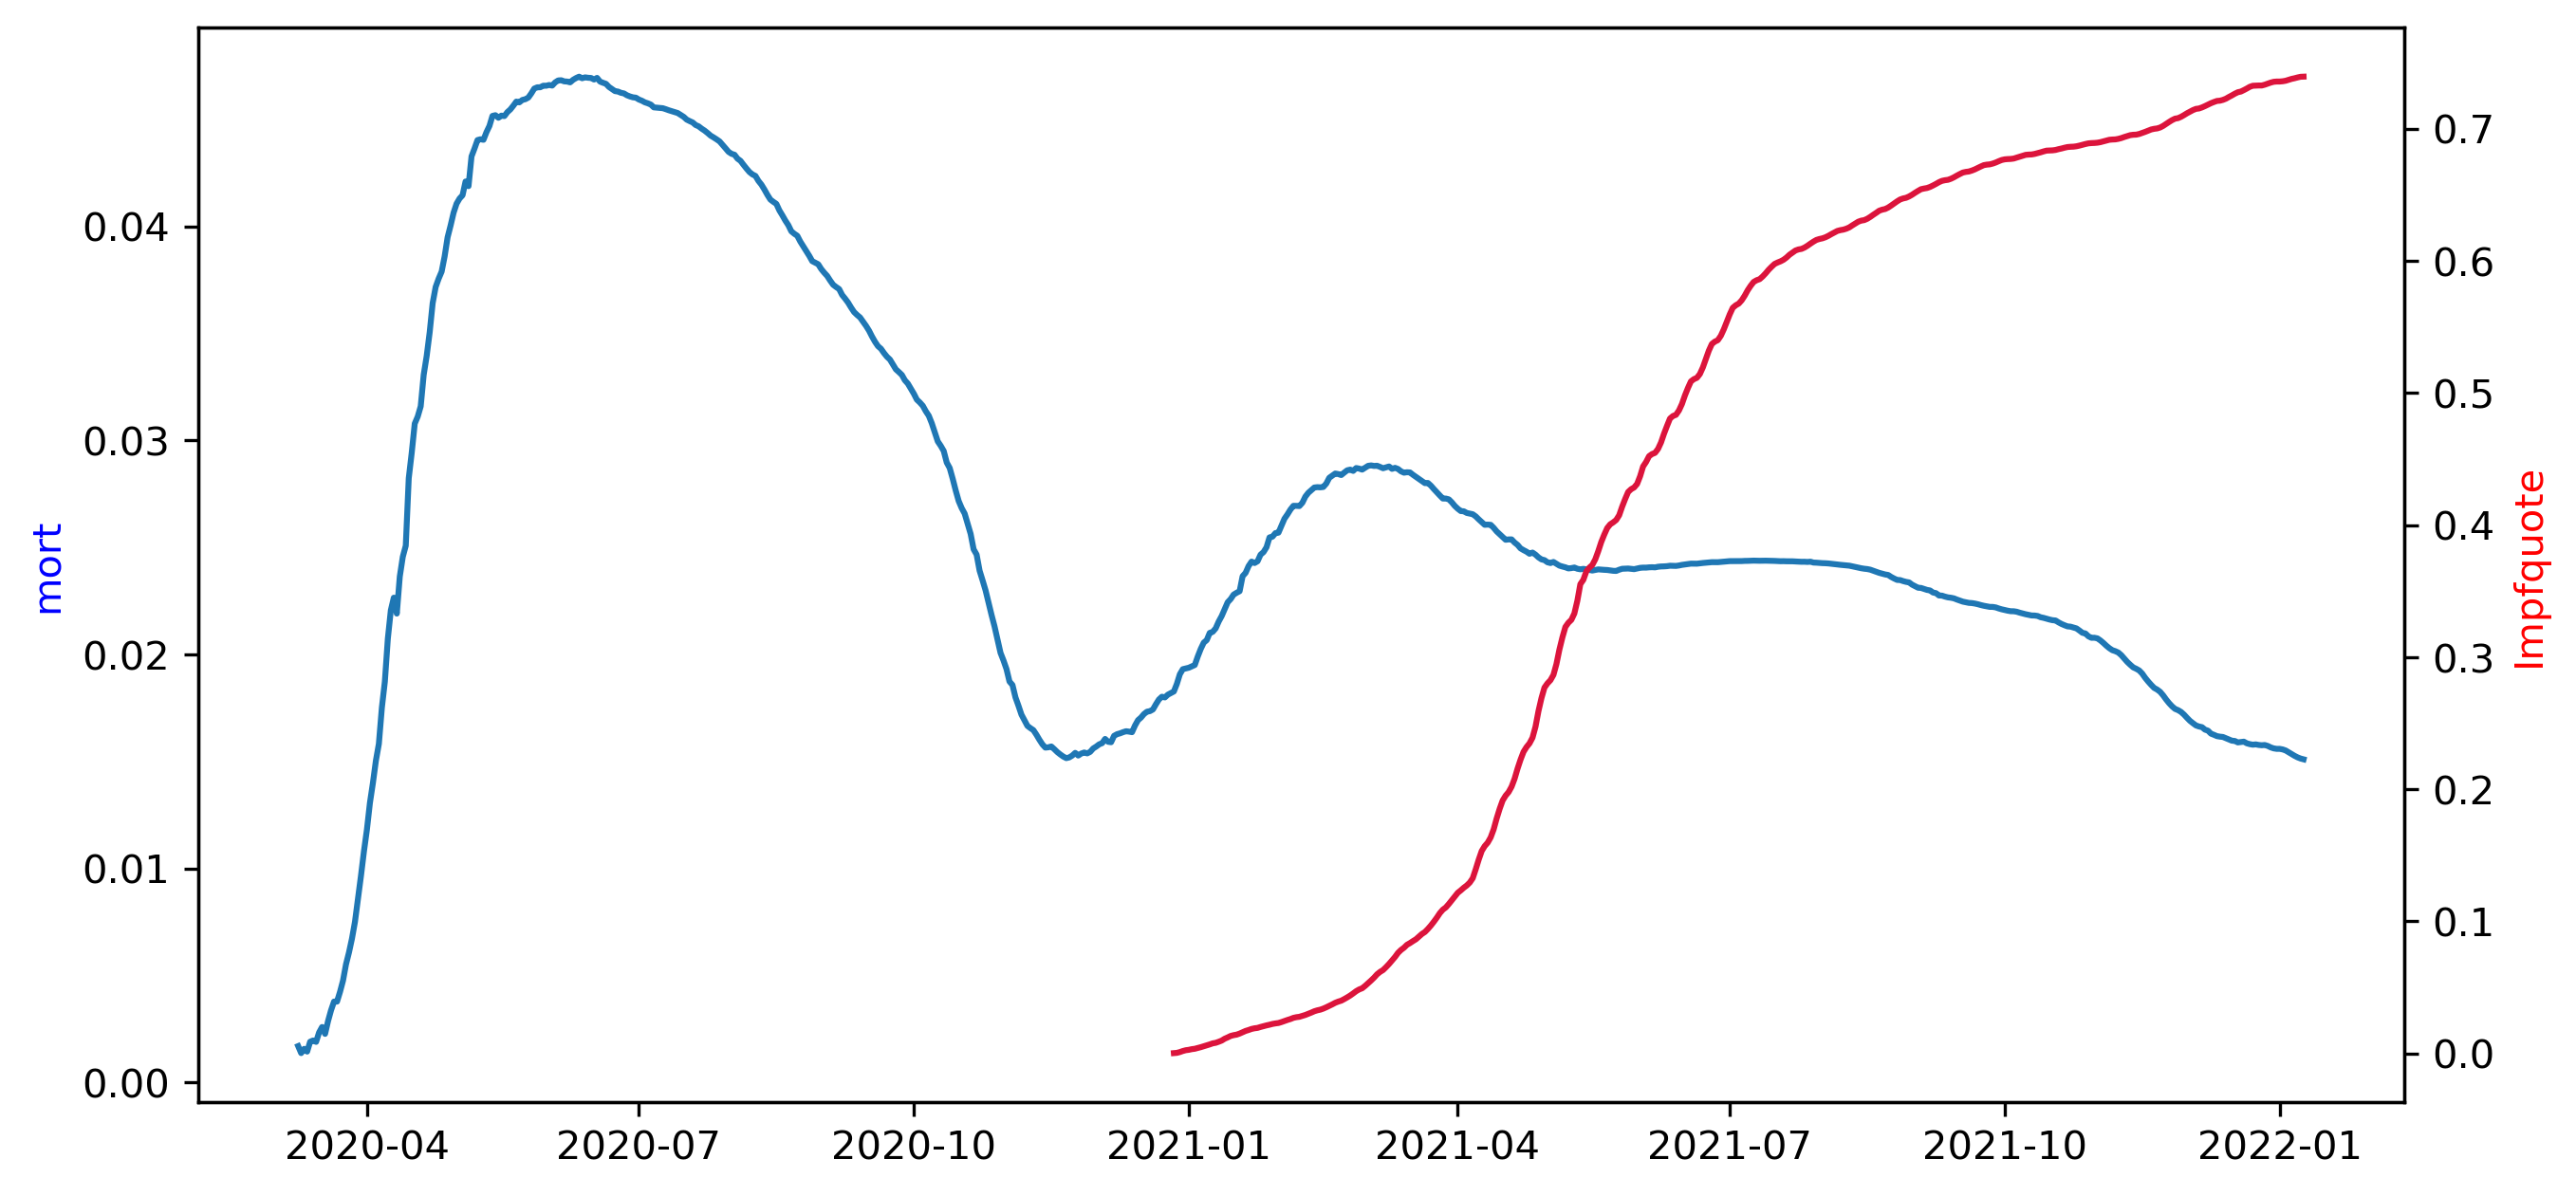

In [11]:
fig, ax1 = plt.subplots(figsize=(10,5),dpi=300)
ax1.plot(deu.date,deu.mort)
ax2 = ax1.twinx()
ax2.plot(deu.date,deu.people_vaccinated_per_hundred/100,color="crimson")
ax1.set_ylabel('mort', color='b')
ax2.set_ylabel('Impfquote', color='r')
#ylim = ax2.get_ylim()
#plt.vlines("2021-11-01",*ylim,colors="k")

## Hypothesentests
statistic: Interested in mean number of deaths after and before 50% of population are vaccinated, that means we have 2 samples which we want to test if there is a significant difference between them
sample 1 is from _ to _ (before)
sample 2 is _
 
$$
H_0: \mu_1 - \mu_2 \le 0
$$
$$
H_1: \mu_1 - \mu_2 > 0
$$



### Finding the two groups of the same size
    lets try 3 month
        group1(before) 17.6.20-17.9.20
        group2(after)  17.6.21-17.9.21

In [12]:
deu[["people_vaccinated_per_hundred","date"]].loc[(deu.people_vaccinated_per_hundred>49.0)&(deu.people_vaccinated_per_hundred<51.0)]

,people_vaccinated_per_hundred,date
53644,49.17,2021-06-15
53645,49.82,2021-06-16
53646,50.38,2021-06-17
53647,50.88,2021-06-18


In [13]:
group1=deu.new_deaths[deu.date=="2021-06-20"]
group1

53649    10.0
Name: new_deaths, dtype: float64